## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


## Load the train data

In [2]:
train_data = pd.read_csv('train_data.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
train_data

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


# Load the test data

In [3]:
test_data = pd.read_csv('test_data.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'DESCRIPTION'])
test_data 

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


# Load the test data solution

In [4]:
test_data_solution = pd.read_csv('test_data_solution.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data_solution

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


In [6]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [7]:
print(train_data.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [8]:
print(test_data.isnull().sum())

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64


In [9]:
print(train_data['GENRE'].value_counts())

GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


In [10]:
# Add a new column for the length of descriptions
train_data['DESC_LENGTH'] = train_data['DESCRIPTION'].apply(lambda x: len(x.split()))
train_data


,ID,TITLE,GENRE,DESCRIPTION,DESC_LENGTH
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,92
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,32
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,114
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,192
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,106
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,85
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,131
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",48
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,119


# Plot the distribution of description lengths

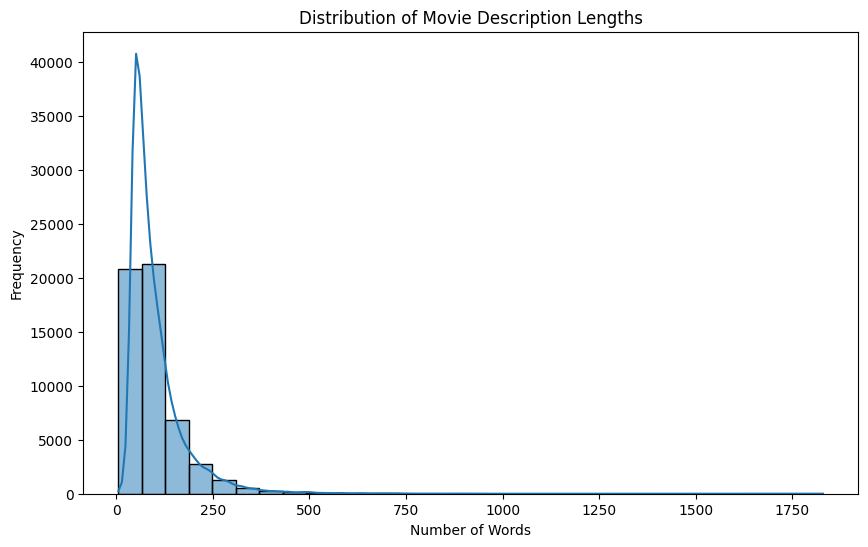

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['DESC_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Movie Description Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [12]:
# List all unique genres in the dataset
unique_genres = train_data['GENRE'].unique()
unique_genres 

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

## Distribution of Genres

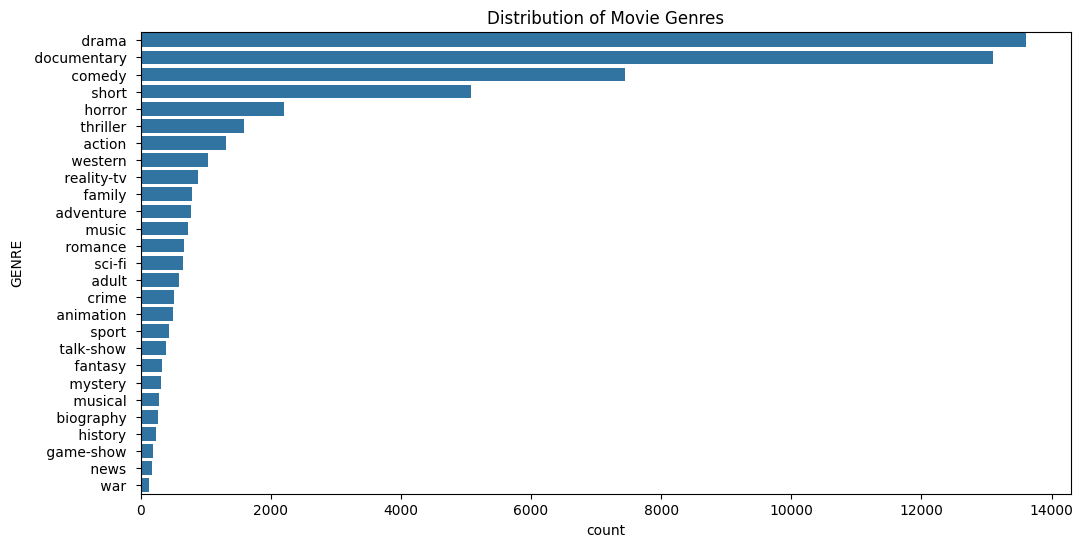

In [13]:
# Plot the distribution of genres
plt.figure(figsize=(12,6))
sns.countplot(y='GENRE', data=train_data, order=train_data['GENRE'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.show()


## Word Cloud of the top 5 Descriptions

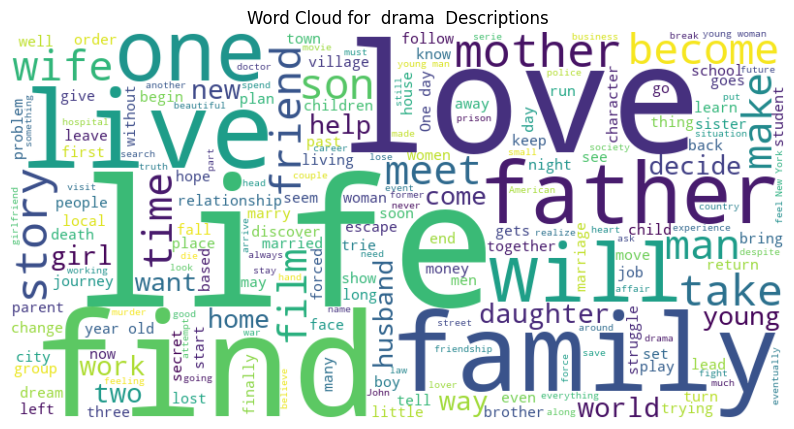

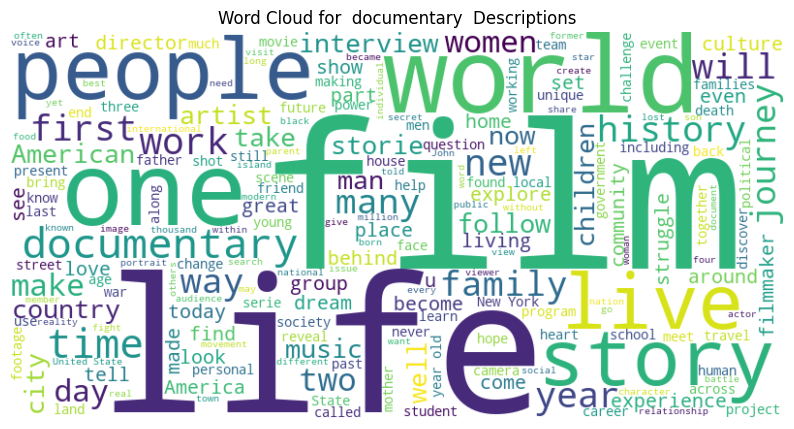

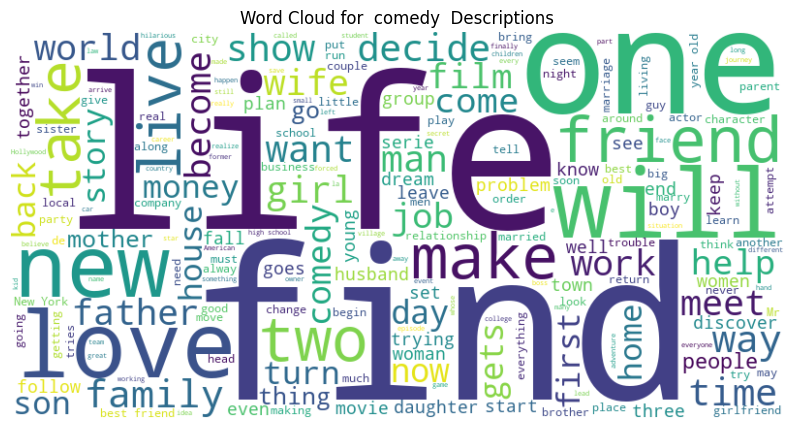

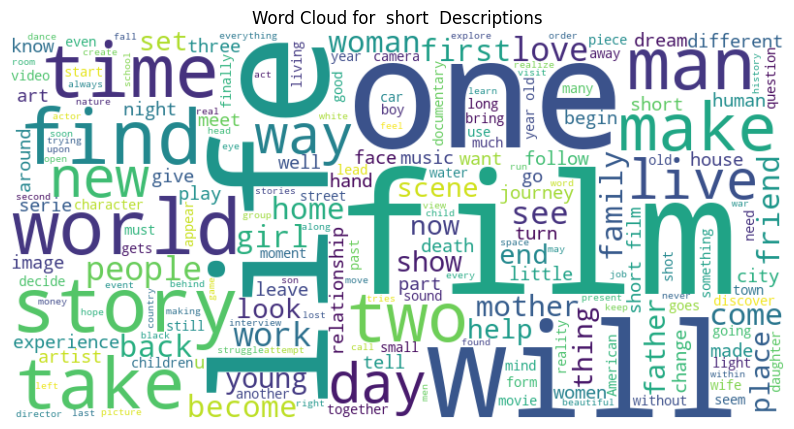

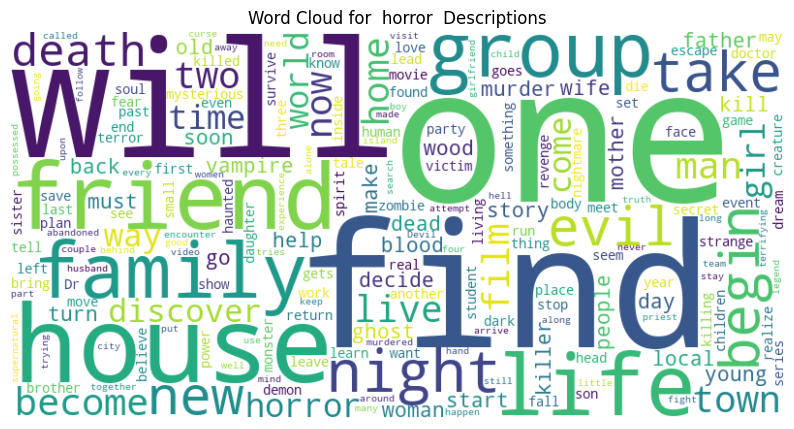

In [14]:
# Identify the top 5 most frequent genres
top_genres = train_data['GENRE'].value_counts().head(5).index

# Generate word clouds for each of the top 5 genres
for genre in top_genres:
    subset = train_data[train_data['GENRE'] == genre]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset['DESCRIPTION']))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {genre} Descriptions')
    plt.show()

# Data Preprocessing and Splitting

In [15]:

def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())  # Lemmatization
    return text


In [16]:
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(preprocess_text)
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].apply(preprocess_text)

In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=100000)

In [18]:
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])

In [19]:
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

In [20]:
# Encode the target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['GENRE'])

In [21]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Naive Bayes model

In [22]:
nb_model = MultinomialNB()
nb_model.fit(X_train_split, y_train_split)

MultinomialNB()

In [23]:
y_val_pred_nb = nb_model.predict(X_val_split)
print("Naive Bayes Model Evaluation:")
print(classification_report(y_val_split, y_val_pred_nb, target_names=encoder.classes_))
print(f'Accuracy: {accuracy_score(y_val_split, y_val_pred_nb):.4f}\n')

Naive Bayes Model Evaluation:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.63      0.05      0.10      1443
       crime        0.00      0.00      0.00       107
 documentary        0.52      0.90      0.66      2659
       drama        0.38      0.87      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00

# Logistic Regression model

In [24]:
lr_model = LogisticRegression()
lr_model.fit(X_train_split, y_train_split)

LogisticRegression()

In [25]:
y_val_pred_lr = lr_model.predict(X_val_split)
print("Logistic Regression Model Evaluation:")
print(classification_report(y_val_split, y_val_pred_lr, target_names=encoder.classes_))
print(f'Accuracy: {accuracy_score(y_val_split, y_val_pred_lr):.4f}\n')

Logistic Regression Model Evaluation:
               precision    recall  f1-score   support

      action        0.57      0.23      0.33       263
       adult        0.77      0.21      0.34       112
   adventure        0.51      0.13      0.21       139
   animation        0.50      0.02      0.04       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.58      0.55      1443
       crime        0.33      0.02      0.04       107
 documentary        0.65      0.85      0.74      2659
       drama        0.53      0.80      0.64      2697
      family        0.47      0.05      0.10       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.95      0.45      0.61        40
     history        0.00      0.00      0.00        45
      horror        0.67      0.55      0.61       431
       music        0.71      0.42      0.53       144
     musical        0.00      0.00      0.00        50
     mystery        0.00  

# Linear SVC model

In [26]:
svc_model = LinearSVC()
svc_model.fit(X_train_split, y_train_split)

LinearSVC()

In [27]:
y_val_pred_svc = svc_model.predict(X_val_split)
print("Linear SVC Model Evaluation:")
print(classification_report(y_val_split, y_val_pred_svc, target_names=encoder.classes_))
print(f'Accuracy: {accuracy_score(y_val_split, y_val_pred_svc):.4f}\n')


Linear SVC Model Evaluation:
               precision    recall  f1-score   support

      action        0.46      0.33      0.39       263
       adult        0.75      0.48      0.59       112
   adventure        0.46      0.22      0.30       139
   animation        0.32      0.10      0.15       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.58      0.55      1443
       crime        0.27      0.07      0.11       107
 documentary        0.68      0.80      0.74      2659
       drama        0.56      0.73      0.63      2697
      family        0.35      0.16      0.22       150
     fantasy        0.55      0.08      0.14        74
   game-show        0.83      0.62      0.71        40
     history        0.50      0.02      0.04        45
      horror        0.64      0.64      0.64       431
       music        0.61      0.56      0.58       144
     musical        0.30      0.06      0.10        50
     mystery        0.33      0.04 

# Make predictions on the test data using the Support Vector Machine Model

In [28]:

y_test_pred = svc_model.predict(X_test)

# Decode the predicted labels to genre names
y_test_pred_genres = encoder.inverse_transform(y_test_pred)

# Add predictions to the test data
test_data['PREDICTED_GENRE'] = y_test_pred_genres

# For the ID of 3, 4 and 5
ID= [3,4,5]  

filtered_test_data = test_data[test_data['ID'].isin(ID)]

# Display the  3, 4 and 5th row of the test data with predictions
print(filtered_test_data [['ID', 'TITLE', 'PREDICTED_GENRE']].head())

   ID                          TITLE PREDICTED_GENRE
2   3   Off the Beaten Track (2010)     documentary 
3   4        Meu Amigo Hindu (2015)           drama 
4   5             Er nu zhai (1955)           drama 


# Comparing the test solution to the prediction 

In [29]:
test_data_solution = pd.read_csv('test_data_solution.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data_solution 

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


## Predict the genre of the new description

In [30]:

new_des = ("National Geographic reviews Jack Horner's research into juvenile dinosaurs. His evidence suggests that juvenile dinosaurs looked sufficiently different from adults that they have sometimes been mistaken for a separate species. The program examines specific changes that occurred as dinosaurs aged and speculates on why the changes were necessary."
                   )

In [31]:

def predict_genre(svc_model, description):
    processed_des = preprocess_text(description)
    X_input = tfidf_vectorizer.transform([processed_des])
    predicted_genre_encoded = svc_model.predict(X_input)
    predicted_genre = encoder.inverse_transform(predicted_genre_encoded)
    return predicted_genre[0]

predicted_genre = predict_genre(svc_model, new_des)
print(f"The predicted genre for the movie is: {predicted_genre}")

The predicted genre for the movie is:  documentary 
